## Superstore data analysis project using two types of Dataframes:
    1. Pandas Dataframes.
    2. Koalas Dataframes.

In [5]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from databricks import koalas as ks

In [6]:
spark = SparkSession.builder.appName('superstore').getOrCreate()

In [8]:
df = spark.read.csv('../datasets/superstore_dataset.csv',inferSchema=True,header=True, encoding = "ISO-8859-1")
data = pd.read_csv('../datasets/superstore_dataset.csv', encoding = "ISO-8859-1")
kdf = ks.from_pandas(data)

In [9]:
kdf.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,None,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,None,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,None,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [6]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [10]:
kdf.shape

(51290, 24)

In [8]:
data.shape

(51290, 24)

In [11]:
kdf.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [10]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

****
#### 1. Who are the top-20 most profitable customers. Show them through plots.
****

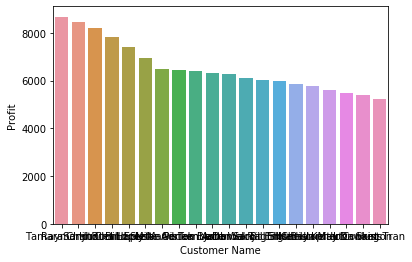

In [27]:
result = data.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)

sns.barplot(x='Customer Name',y='Profit',data=result)

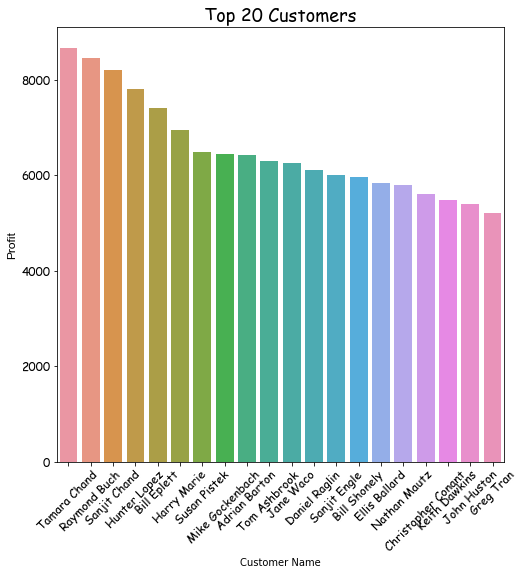

In [12]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
sns.barplot(x = "Customer Name",y= "Profit",
            data=result,
            ax = ax1)
ax1.set_ylabel("Profit", fontname="Arial", fontsize=12)
ax1.set_title("Top 20 Customers", fontname='Comic Sans MS', fontsize=18)
# Set the font name for axis tick labels to be Comic Sans
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans MS")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans MS")
    tick.set_fontsize(12)
# Rotate the labels as the Customer names overwrites on top of each other
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
plt.show()

#### Implement in koalas:

        result = kdf.groupby(["Customer Name"])['Profit'].sum().reset_index().sort_values('Profit',ascending = False).head(20)

        sns.barplot(x='Customer Name',y='Profit',data=result.to_pandas())

****
#### 2. What is the distribution of our customer Segment
****


In [15]:
kdf['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

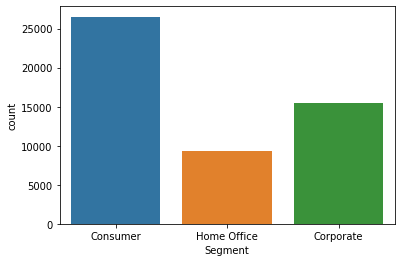

In [20]:
sns.countplot("Segment", data = kdf.to_pandas())

#### Implementation in koalas and pandas df is same in this case.

****
#### 3. Who are our top-20 oldest customers
****

In [16]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [17]:
oldest = pd.DataFrame({'Counts':data.groupby(["Order Date","Customer Name"]).size()}).reset_index()

In [18]:
oldest.head(20)

,Order Date,Customer Name,Counts
0,2011-01-01,Annie Thurman,1
1,2011-01-01,Eugene Moren,1
2,2011-01-01,Joseph Holt,3
3,2011-01-01,Toby Braunhardt,1
4,2011-01-02,Dave Hallsten,3
5,2011-01-02,David Kendrick,2
6,2011-01-02,Gene Hale,2
7,2011-01-02,Ionia McGrath,2
8,2011-01-02,Liz Carlisle,1
9,2011-01-02,Patrick O'Brill,1


#### Koalas implementation here

In [28]:
kdf['Order Date']=ks.to_datetime(kdf['Order Date'])

In [37]:
# Using pandas data to use groupby 
old_date = ks.DataFrame({'Counts':data.groupby(["Order Date","Customer Name"]).size()}).reset_index()

In [39]:
old_date.head(10)

,Order Date,Customer Name,Counts
0,1/1/2011,Annie Thurman,1
1,1/1/2011,Eugene Moren,1
2,1/1/2011,Joseph Holt,3
3,1/1/2011,Toby Braunhardt,1
4,1/1/2013,Bobby Odegard,1
5,1/1/2013,Chris Cortes,2
6,1/1/2013,Jay Kimmel,1
7,1/1/2013,Jim Radford,2
8,1/1/2013,Joe Elijah,5
9,1/1/2013,Joy Smith,1


****
#### 4. Which customers have visited this store just once
****

In [42]:
customer_visit = pd.DataFrame({'Counts': data.groupby('Customer Name').size()}).reset_index()


In [20]:
customer_visit[customer_visit['Counts']==1]

,Customer Name,Counts


#### Koalas implementation:

In [45]:

customer_visit_k = kdf.groupby('Customer Name').size().reset_index()
customer_visit_k[customer_visit_k['count']==1]

,Customer Name,count


#### Since it returns an empty data frame, there are no customers that have visited this store just once

#### 6. What is the distribution of customers Market wise?

In [21]:
customer_market = pd.DataFrame({'counts': data.groupby(['Market','Customer Name']).size()}).reset_index()
customer_market.shape

(4872, 3)

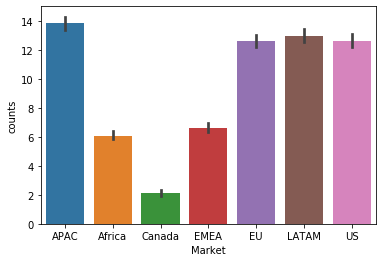

In [22]:
sns.barplot(x='Market',y='counts',data=customer_market)

#### Koalas implementation

In [46]:
customer_market_k = kdf.groupby(['Market','Customer Name']).size().reset_index()
customer_market_k.shape

(4872, 3)

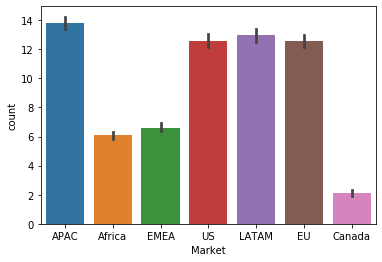

In [55]:
sns.barplot(x='Market',y='count',data=customer_market_k.to_pandas())

In [23]:
#7. What is the distribution of customers Market wise and Region wise
customer_market_region = pd.DataFrame({'Count':data.groupby(['Market','Region','Customer Name']).size()}).reset_index()

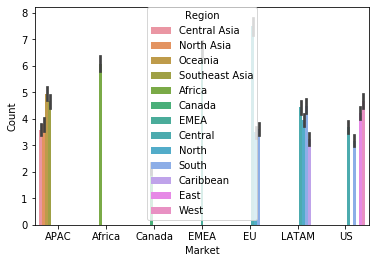

In [24]:
sns.barplot(x='Market',hue='Region',y='Count',data=customer_market_region)

#### Koalas implementation will be same as above

#### for APAC, the largest # of customers are basd out of Oceania, followed by Southeast Asia
#### for US, the largest # of customers are based out of Western Region followed by East

#### 8.Distribution of  Customers by Country & State - top 15

In [25]:
customer_country = pd.DataFrame({'Count':data.groupby(['Country','State']).size()}).reset_index().sort_values('Count',ascending = False).head(15)
customer_country

,Country,State,Count
1025,United States,California,2001
1019,United Kingdom,England,1499
1052,United States,New York,1128
1063,United States,Texas,985
336,France,Ile-de-France,981
56,Australia,New South Wales,781
361,Germany,North Rhine-Westphalia,719
58,Australia,Queensland,717
316,El Salvador,San Salvador,615
1058,United States,Pennsylvania,587


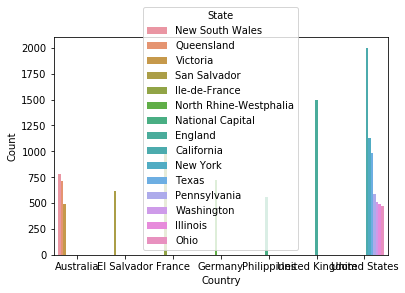

In [26]:
sns.barplot(x='Country',y='Count',hue='State',data=customer_country.sort_values('Country'))

#### Koalas implementation will be same as above

####  Top 20 Cities by Sales Volume

In [27]:
sales_city = data.groupby('City')['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending=False).head(20)
sales_city

,City,Quantity
2290,New York City,3417
1910,Los Angeles,2879
2499,Philadelphia,1981
2843,San Francisco,1935
1996,Manila,1661
2907,Santo Domingo,1649
2936,Seattle,1590
1400,Houston,1466
3178,Tegucigalpa,1334
1989,Managua,1233


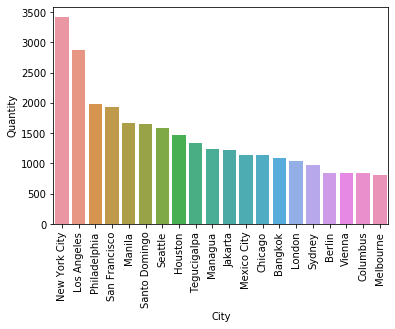

In [28]:
ax = plt.figure().add_subplot()
sns.barplot(x='City',y='Quantity',data=sales_city,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Top 10 products

In [29]:
sales_product = data.groupby(['Product Name'])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity', ascending=False).head(10)
sales_product

,Product Name,Quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


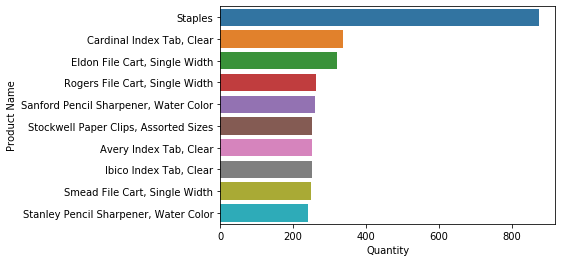

In [30]:
sns.barplot(x='Quantity',y='Product Name',data=sales_product)

#### Add Handyspark implementation here

#### Top selling products by country (in US)

In [31]:
top_selling = data.groupby(['Product Name','Country'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
# Only keeping US data
top_selling = top_selling[top_selling['Country']=='United States'].sort_values('Quantity',ascending=False).head(10)

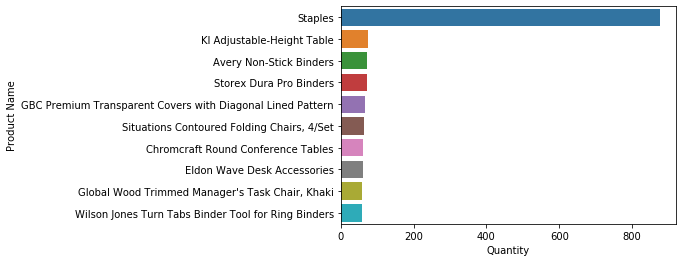

In [35]:
sns.barplot(x='Quantity',y='Product Name',data=top_selling)

#### Add HandySpark implementation here

#### Sales of product category and subcategory

In [32]:
sales_category = data.groupby(['Category','Sub-Category'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
sales_category

,Category,Sub-Category,Quantity
6,Office Supplies,Binders,21429
11,Office Supplies,Storage,16917
5,Office Supplies,Art,16301
10,Office Supplies,Paper,12822
1,Furniture,Chairs,12336
16,Technology,Phones,11870
2,Furniture,Furnishings,11225
13,Technology,Accessories,10946
9,Office Supplies,Labels,9322
12,Office Supplies,Supplies,8543


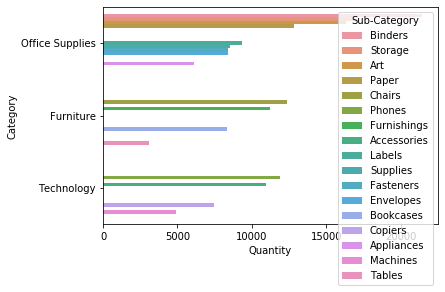

In [33]:
sns.barplot(x='Quantity',y='Category',hue='Sub-Category',data=sales_category)

#### Koalas implementation:

In [57]:
sales_category_k = kdf.groupby(['Category','Sub-Category'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
sales_category_k.head(2)

,Category,Sub-Category,Quantity
8,Office Supplies,Binders,21429
3,Office Supplies,Storage,16917


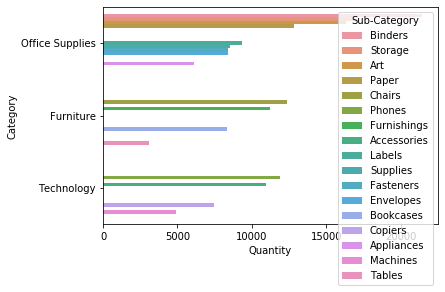

In [59]:
sns.barplot(x='Quantity',y='Category',hue='Sub-Category',data=sales_category_k.to_pandas())

### We can see that office Supplies, Binders and Storage are the best sellers.